# Classification of handwritten digits

1. Check the performance of the logistic regression model (perceptron) on the digits dataset.
2. Plot digits for which the classifier is wrong
3. Find nearest neighbors of the test set in the train set using cosine similarity or Euclidean distance
4. Compare the performance with the $K$-nearest neighbors model
5. Assume no known labels and cluster using $K$-means algorithm

## Opening the dataset, train test split

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

def show_digit(image):
    plt.imshow(image, cmap=plt.cm.gray_r)

/home/jj/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
from sklearn.model_selection import train_test_split

X = digits.images.reshape(-1, 64)
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [3]:
X.shape, X_train.shape, X_test.shape

((1797, 64), (1437, 64), (360, 64))

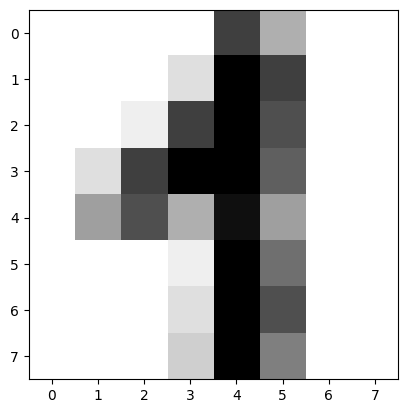

In [4]:
show_digit(digits.images[42])

In [5]:
X[42]  # Flattened array of pixels

array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

## Logistic Regression (supervised)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/jj/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
model.score(X_train, y_train)

1.0

In [10]:
model.score(X_test, y_test)

0.9583333333333334

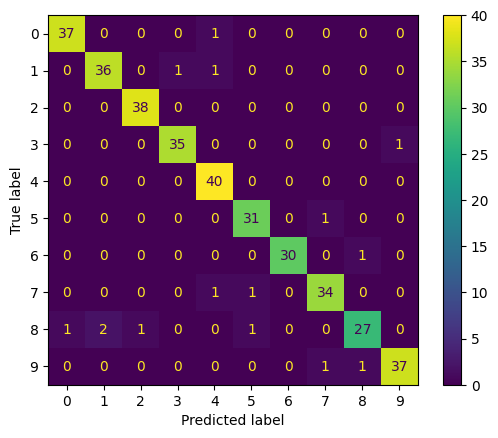

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

<BarContainer object of 10 artists>

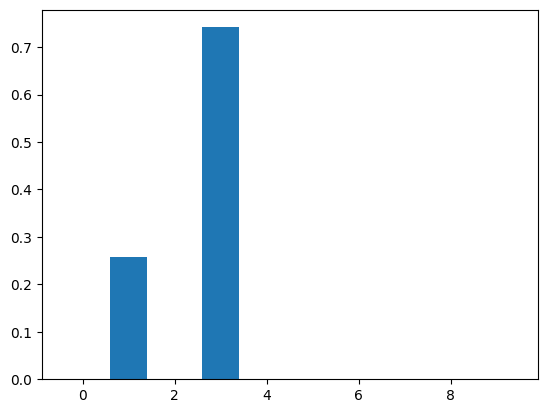

In [12]:
bad_sample = list(model.predict(X_test) != y_test).index(True)
proba = model.predict_proba(X_test[bad_sample].reshape(1, -1)).reshape(-1)
plt.bar(range(10), proba)

In [13]:
proba

array([1.93012966e-18, 2.58224849e-01, 2.53399557e-06, 7.41754862e-01,
       4.76002847e-14, 2.71922163e-16, 3.38478732e-08, 9.38492527e-12,
       1.38557628e-05, 3.86566752e-06])

<BarContainer object of 10 artists>

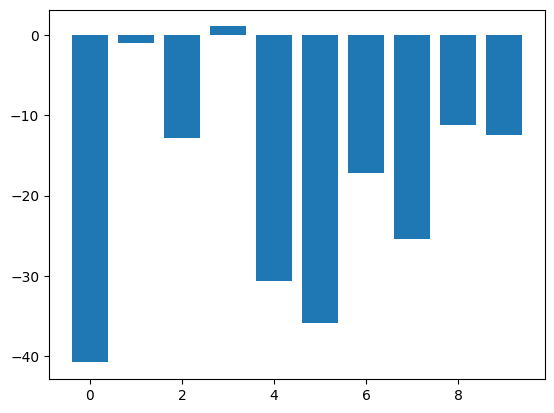

In [14]:
import numpy as np

plt.bar(range(10), np.log(proba / (1 - proba)))

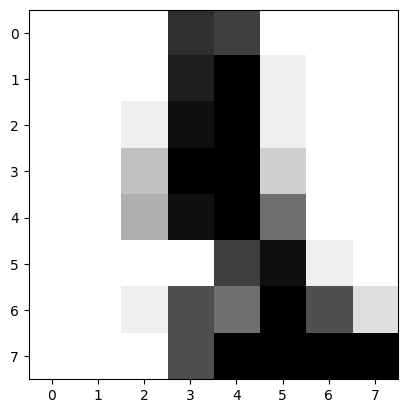

In [15]:
show_digit(X_test[bad_sample].reshape(8, 8))

In [16]:
y_test[bad_sample]

1

## Nearest neighbors of the test set on the train set

In [17]:
%%time
from sklearn.metrics.pairwise import cosine_similarity

# Similarité cosinus
similarity = cosine_similarity(X_train, X_train)

CPU times: user 11 ms, sys: 55 ms, total: 66 ms
Wall time: 11.3 ms


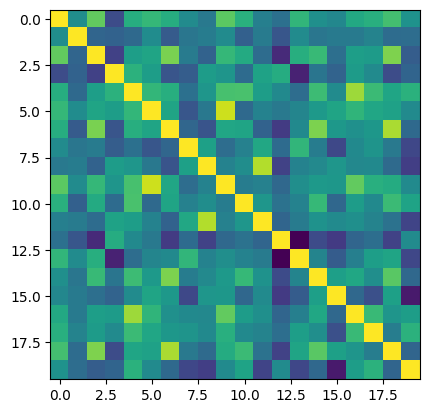

In [18]:
plt.imshow(similarity[:20, :20])

In [19]:
similarity = cosine_similarity(X_test, X_train)

In [20]:
similarity.shape

(360, 1437)

In [21]:
closest_neighbors = similarity[bad_sample].argsort()[-5:]

In [22]:
closest_neighbors

array([ 870,  590,  144,  724, 1235])

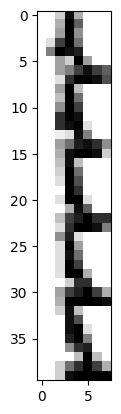

In [23]:
show_digit(X_train[closest_neighbors].reshape(-1, 8))

In [24]:
y_train[closest_neighbors]

array([1, 1, 1, 1, 1])

## $k$-nearest neighbor algorithm (supervised)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9833333333333333

## Coordinates according to two principal components (unsupervised)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_train_red = pca.fit_transform(X_train)
X_train_red.shape

(1437, 2)

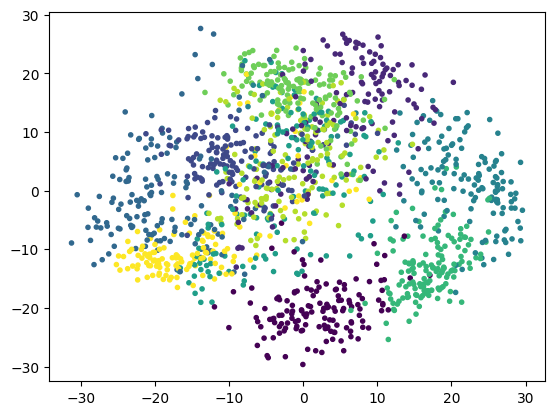

In [49]:
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c=y_train, marker='.')
plt.savefig('digits-pca-truth.png')

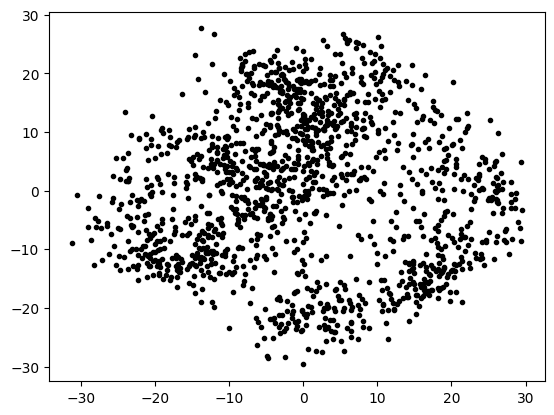

In [47]:
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c='black', marker='.')
plt.savefig('digits-pca.png')

## $K$-means (unsupervised)

In [28]:
from sklearn.cluster import KMeans

km = KMeans(10)
km.fit(X_train)

KMeans(n_clusters=10)

In [29]:
km.labels_

array([2, 9, 2, ..., 2, 8, 0], dtype=int32)

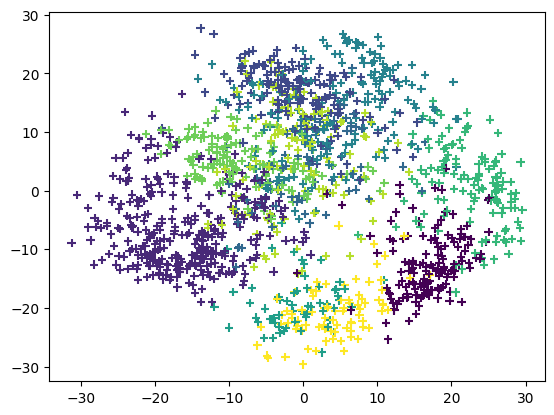

In [51]:
plt.scatter(X_train_red[:, 0], X_train_red[:, 1], c=km.labels_, marker='+')

In [31]:
km.labels_[y_train == 0]  # Found a cluster containing all zeroes

array([9, 9, 9, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 5, 9, 5, 5, 9,
       9, 9, 9, 5, 5, 9, 9, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 5,
       9, 9, 9, 9, 9, 9, 5, 9, 5, 5, 5, 9, 5, 9, 5, 9, 5, 5, 9, 9, 5, 9,
       9, 5, 9, 9, 5, 5, 9, 9, 5, 5, 5, 9, 9, 5, 9, 5, 9, 5, 9, 5, 9, 9,
       9, 5, 9, 9, 5, 5, 9, 9, 9, 5, 9, 9, 9, 5, 5, 5, 9, 5, 9, 9, 9, 9,
       9, 5, 9, 9, 9, 5, 5, 9, 9, 5, 5, 9, 9, 9, 9, 5, 9, 5, 9, 5, 9, 5,
       9, 5, 9, 9, 5, 9, 9, 5], dtype=int32)

In [32]:
km.labels_[y_train == 1]  # But 1 is harder

array([7, 4, 3, 4, 3, 7, 4, 4, 3, 4, 7, 4, 4, 3, 3, 4, 4, 3, 4, 7, 4, 4,
       4, 4, 4, 3, 7, 7, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4,
       4, 4, 3, 3, 8, 3, 4, 4, 4, 3, 4, 4, 7, 4, 3, 3, 3, 4, 3, 3, 4, 4,
       3, 3, 3, 7, 7, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 7, 4, 3, 0, 3, 4, 0,
       4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 7, 7, 4,
       4, 7, 4, 4, 4, 7, 4, 4, 4, 4, 7, 7, 4, 3, 3, 3, 4, 4, 3, 3, 4, 4,
       4, 4, 7, 3, 4, 4, 4, 4, 4, 4, 7, 4], dtype=int32)

In [33]:
from collections import Counter

for i in range(10):
    cluster = (km.labels_ == i)
    print('Cluster', i, 'contains', Counter(y_train[cluster]))

Cluster 0 contains Counter({6: 147, 5: 2, 8: 2, 1: 2})
Cluster 1 contains Counter({3: 134, 9: 114, 8: 37, 5: 33, 2: 9})
Cluster 2 contains Counter({7: 137, 3: 6, 4: 6, 9: 5, 2: 3, 8: 2})
Cluster 3 contains Counter({1: 44, 9: 16, 8: 8, 4: 3, 7: 2, 2: 1, 6: 1})
Cluster 4 contains Counter({8: 84, 1: 79, 2: 7, 4: 5, 3: 5, 7: 4, 6: 1, 9: 1})
Cluster 5 contains Counter({0: 60, 9: 1})
Cluster 6 contains Counter({4: 127, 5: 1})
Cluster 7 contains Counter({2: 119, 1: 18, 8: 4})
Cluster 8 contains Counter({5: 114, 8: 4, 9: 4, 3: 2, 1: 1})
Cluster 9 contains Counter({0: 80, 8: 1, 6: 1})


(<matplotlib.image.AxesImage at 0x7ce640326b30>, array([7, 7, 7, 7, 3]))

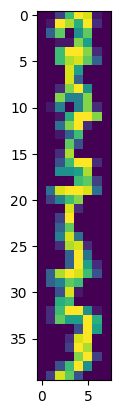

In [34]:
cluster = (km.labels_ == 2)
plt.imshow(X_train[cluster][:5].reshape(-1, 8)), y_train[cluster][:5]

## t-SNE

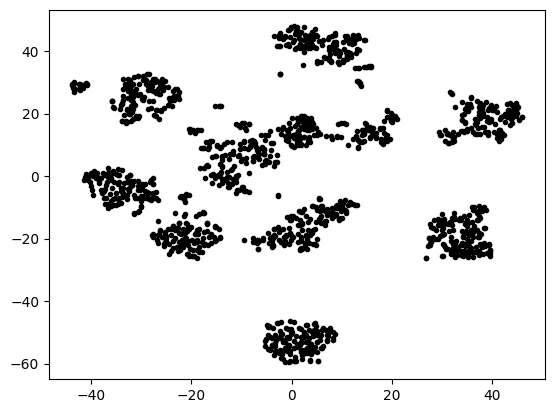

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(2)
X_train_tsne = tsne.fit_transform(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c='black', marker='.')
plt.savefig('digits-tsne.png')

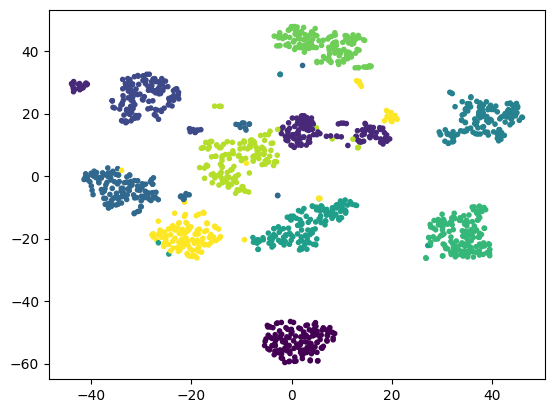

In [44]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, marker='.')
plt.savefig('digits-tsne-truth.png')